In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/__script__.py
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/cachetools-5.5.0-py3-none-any.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/MarkupSafe-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/gast-0.4.0-py3-none-any.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/wrapt-1.16.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/pyasn1-0.6.1-py3-none-any.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/keras-2.9.0-py2.py3-none-any.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/tensorflow-2.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-67807825-at-10-21-2024-03-48-54/oauthlib-3.2.2-py3-none

In [2]:
import tensorflow as tf
from tensorflow.python import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import seaborn as sns
print(tf.__version__)

2.9.1


In [3]:
train_size = 30000
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
img_rows, img_cols = 28, 28 # each one is 28 pixel by 28 pixel (784 pixels)
num_classes = 10 #no. of target values 0 to 9 "labels"

In [5]:

# Separate features and labels from the training data
x = train.drop(columns=['label']).values  # Features (pixel values)
y = train['label'].values  # Labels (digits 0–9)

# Reshape the feature data to (num_samples, 28, 28, 1) for CNN
x = x.reshape(-1, img_rows, img_cols, 1)

# One-hot encode the labels
y = to_categorical(y, num_classes)

# Normalize the pixel values (from 0 to 255) to (0 to 1)
x = x / 255

# Split the training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


### Why `Sequential`? 
**Simple architecture**: If your model can be built by stacking layers without complex branching or skipping connections (like in more advanced architectures), `Sequential` is ideal.\
**Straightforward**: It's easy to use and requires fewer lines of code for simple architectures.

In [6]:
# Build the CNN model
# The Sequential() model is used when you want to stack multiple layers in order. 
# Each layer is added on top of the previous one using model.add()
model = Sequential()
# First we start with two convolutional layers "Conv2D"

# "32" is the no. of filters we use which defines how many features the convolutional layer will learn from the input data

# (3,3) means that the convolutional layer uses a 3x3 filter, 
# which is a small square matrix that moves across the input image to detect local features such as edges, textures, or patte

# "input_shape=(img_rows, img_cols, 1)" is represting the hight and width of the image which is 28x28 pixel image 
# the 1 here ^^ is a refreence to the number of channels since these are grayscale images there is only one channel
# But if theyh were RGB ther would be 3 channels ine for each color
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))  
# A dropout layer is used for each mini-batch would randomly drop 50% of the neurons to prevent overfititng 
# Which prevents the network from relying too much on specific neurons
model.add(Dropout(0.5))
# As we go deeper into the network, the model learns more complex and abstract features, 
#and increasing the number of filters helps the network capture these more intricate details effectively.
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Increased filters
model.add(Dropout(0.5))

# Flatten layer comes at the end of convolutional layers before the conncted layers
# they turn a 2D array into 1D so here we have a 28x28 it will be converted into a 1D array of 784
# We do this because dense layers cant process more than one dimensional like 2D or 3D
model.add(Flatten())

# 128 indactes the no of neurons in a Dense layer aka "fully connected layer"
# its a common practice to start with 128 and with trail and error alter it using power of 2 eg. "28,64,128,256"
# The main purpose of a Dense layer is to combine the features extracted by the convolutional layers and make decisions based on these features
model.add(Dense(128, activation='relu'))

# this is the output layer. The layer that makes the prediction using softmax activation function
# The number of neurons corresponds to the number of possible classes
model.add(Dense(num_classes, activation='softmax'))

# In this last layer we configure the model for training. It sets the loss function, optimizer, and metrics that the model will use during training and evaluation
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=128),
          validation_data=(x_val, y_val), epochs=10, steps_per_epoch=328)





Epoch 1/10
328/328 [==============================] - 69s 208ms/step - loss: 0.4588 - accuracy: 0.8544 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 2/10
328/328 [==============================] - 67s 203ms/step - loss: 0.1544 - accuracy: 0.9515 - val_loss: 0.0657 - val_accuracy: 0.9800
Epoch 3/10
328/328 [==============================] - 65s 199ms/step - loss: 0.1130 - accuracy: 0.9652 - val_loss: 0.0455 - val_accuracy: 0.9851
Epoch 4/10
328/328 [==============================] - 65s 197ms/step - loss: 0.0966 - accuracy: 0.9701 - val_loss: 0.0422 - val_accuracy: 0.9882
Epoch 5/10
328/328 [==============================] - 64s 195ms/step - loss: 0.0852 - accuracy: 0.9735 - val_loss: 0.0458 - val_accuracy: 0.9864
Epoch 6/10
328/328 [==============================] - 64s 196ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0351 - val_accuracy: 0.9889
Epoch 7/10
328/328 [==============================] - 63s 193ms/step - loss: 0.0691 - accuracy: 0.9779 - val_loss: 0.0369 - val_ac

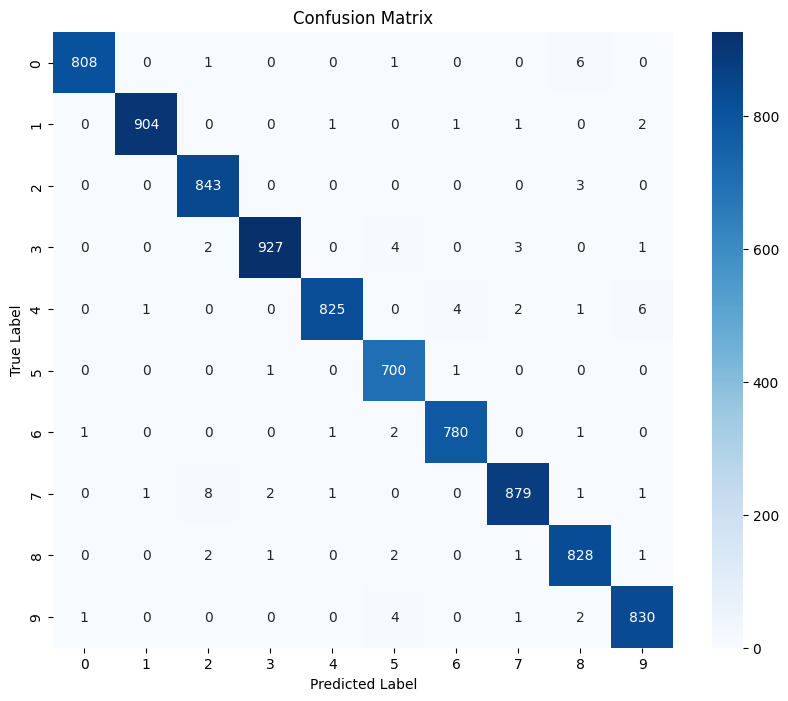

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       816
           1       1.00      0.99      1.00       909
           2       0.98      1.00      0.99       846
           3       1.00      0.99      0.99       937
           4       1.00      0.98      0.99       839
           5       0.98      1.00      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.98      0.99       893
           8       0.98      0.99      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming `model` is your trained model and `x_val`, `y_val` are your validation/test data and true labels

# Step 1: Make predictions on the validation or test data
y_pred = model.predict(x_val)  # Use validation or test data, not training data
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_true = np.argmax(y_val, axis=1)  # Convert one-hot encoded true labels to class labels

# Step 2: Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 4: (Optional) Print classification report for more detailed performance metrics
print(classification_report(y_true, y_pred_classes))


In [8]:
test_data = test.values.reshape(-1, 28, 28, 1)

In [9]:

predictions = pd.DataFrame(model.predict(test_data))


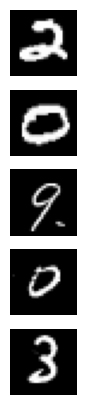

In [10]:
test_images = test.values

images = test_images.reshape(-1, 28, 28)  # Reshape into 28x28 images
def plot_images(images, num_images=5):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility

    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)  # Create subplots (num_images rows, 1 column)
        plt.imshow(images[i], cmap='gray')  # Display image in grayscale
        plt.axis('off')  # Turn off the axis
        
    plt.show()

# Call the function to visualize the first 5 images
plot_images(images, num_images=5)


In [11]:
predictions.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
predicted_labels = np.argmax(predictions, axis=1)

In [13]:
image_ids = np.arange(1, len(predicted_labels) + 1)

submission_df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': predicted_labels})
    
submission_df.to_csv('submission.csv', index=False)